<a href="https://colab.research.google.com/github/Ashwin-Rajesh/PyTorch_IEEE_2021/blob/main/1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Numpy is used for working with matrices
import numpy as np
# Matplotlib is used for plotting graphs
import matplotlib.pyplot as plt

---
# Getting started with numpy

Numpy is used for working with matrices and linear algebra in python. First, lets take a look at creating some matrices

In [2]:
# Creating numpy arrays
print("Zeroes")
print(np.zeros((2, 3)))             # Create a matrix full of zeroes  

print("Ones")
print(np.ones((2, 3)))              # Create a matrix full of ones  

print("Identity")
print(np.eye(5))                    # Create 5 * 5 a identity matrix

print("From list")
print(np.asarray([[1, 2], [3, 4]])) # Create a matrix from a list

print("In a range")
print(np.arange(0, 100, 10))        # From 0(incl) to 100(excl) with difference 10

Zeroes
[[0. 0. 0.]
 [0. 0. 0.]]
Ones
[[1. 1. 1.]
 [1. 1. 1.]]
Identity
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
From list
[[1 2]
 [3 4]]
In a range
[ 0 10 20 30 40 50 60 70 80 90]


In [3]:
# Array slicing
a = np.random.randn(3,5)
print(a)
print((a[1:3, 2:5]))

[[ 0.13146551  0.88271524  0.58439477  0.57914779  0.31948682]
 [ 0.22694858 -1.77169972 -0.20499116 -2.27526299 -1.86140311]
 [ 0.22775964 -0.63065348 -0.75593265  0.7761931   1.02339573]]
[[-0.20499116 -2.27526299 -1.86140311]
 [-0.75593265  0.7761931   1.02339573]]


---
# Linear Regression

Linear regression means fitting a straight line (in 2D) or hyperplane (in higher dimensions) to best fit some data, to be used for predicting outputs for future unknown inputs. 

The most common metric used to measure how well good the prediction is, is mean square error, which means minimizing the euclidean position error between the prediction and the actual datapoint.

In [4]:
# Generate input and output
start = 0                           # Start, End and no of input samples
end   = 100
size  = 50

var   = 0.2

m = 5                               # Slope of actual line
b = -100                            # Intercept of actual line

np.random.seed(0)                   # Seed to get same value for testing (Comment later)
x = np.linspace(start, end, size)   # Generate inputs

# Generate outputs
y = m * (x + (end-start) * var * np.random.randn(size)) + b

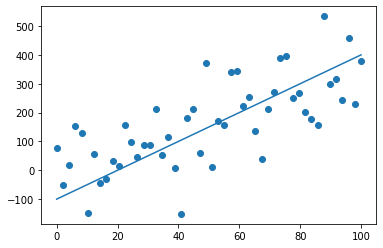

In [5]:
# Plot points using the scatter function
plt.scatter(x, y)
# Plot a line using plot function
plt.plot(x, m*x + b)
plt.show()

This is the plot of the data we have generated. We have generated it from a linear equation with some additional noise.

It is not possible to create a line that goes through all these points at the same time. So, we find the line that has the least Mean Square Error (MSE) possible.

The line is defined by 2 parameters, its slope and intercept. Here, we try to find the mean square error of a given line (passed as slope - m and intercept - b) from the actual data.

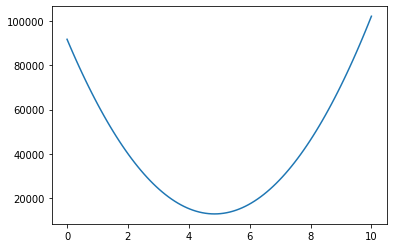

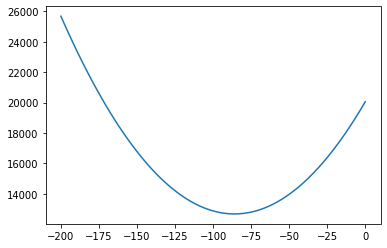

In [6]:
def find_error(m_test, b_test):
  y_pred = m_test * x + b_test
  return np.average(np.square(y - y_pred))

m_test = np.linspace(0, 10, 100)
b_test = np.linspace(-200, 0, 100)

m_errors = []
for i in m_test:
  m_errors.append(find_error(i, b))
plt.plot(m_test, m_errors)
plt.show()

b_errors = []
for i in b_test:
  b_errors.append(find_error(m, i))
plt.plot(b_test, b_errors)
plt.show()

 Initial slope : -8.955, Initial intercept : 3.869


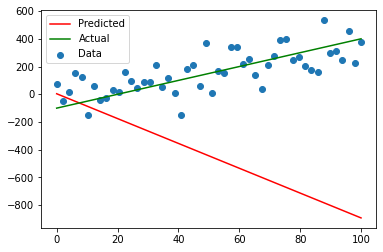

 Error 516964.523 
 Predicted slope : -0.6996, Predicted offset : 3.9906


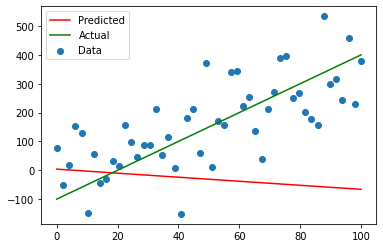

 Error 64930.846 
 Predicted slope : 1.9947, Predicted offset : 4.0296


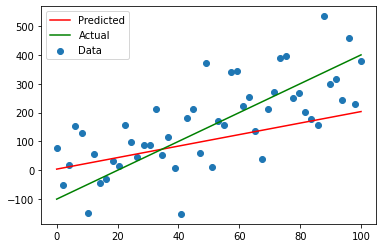

 Error 16777.820 
 Predicted slope : 2.8741, Predicted offset : 4.0417


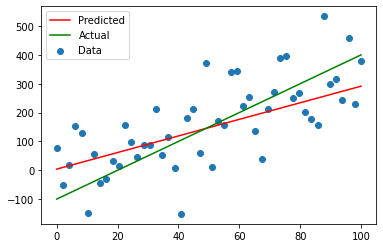

 Error 11648.297 
 Predicted slope : 3.1611, Predicted offset : 4.0449


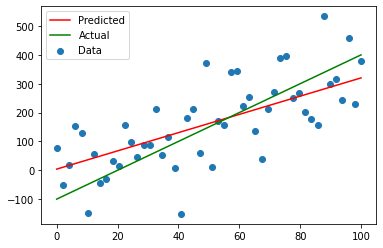

 Error 11101.864 
 Predicted slope : 3.2548, Predicted offset : 4.0453


In [7]:
m_pred = 10 * np.random.randn()
b_pred = 10 * np.random.randn()
 
print(" Initial slope : %.3f, Initial intercept : %.3f"%(m_pred, b_pred))
 
num_iter = 5
 
learning_rate = 1e-4
 
m_hist = []
b_hist = []
error_hist = []
 
for i in range(num_iter):
  y_pred = (x * m_pred) + b_pred
 
  plt.plot(x, y_pred, 'r', label='Predicted')
  plt.plot(x, m*x + b, 'g', label='Actual')
  plt.scatter(x, y, label='Data')
  plt.legend()
  plt.show()
 
  # Error
  error = np.average(np.square(y_pred - y))
  print(" Error %.3f "%(error))
 
  # Derivative of error with respect to y
  d_y = 2 * (y_pred - y)
 
  # Derivative of error with respect to slope
  d_m = d_y * x
  # Derivative of error with respect to intercept
  d_b = d_y
 
  # Update predictions by gradient descept rule
  m_pred = m_pred - learning_rate * np.average(d_m)
  b_pred = b_pred - learning_rate * np.average(d_b)
 
  # Append to history to visualize later
  m_hist.append(m_pred)
  b_hist.append(b_pred)
  error_hist.append(error)
 
  print(" Predicted slope : %.4f, Predicted offset : %.4f"%(m_pred, b_pred))

### Note
You might be wondering "Why go through all this trouble when you have already plotted the graph"! And you are right! This is quite unnecessary in our case. However, it might not be possible to find the error for all inputs and find the one with the mininum for problems with larger number of dimensions. Neural networks nowadays could have millions of parameters! 

When we need to optimize a value with so many parameters to tweak is when we use gradient descent!

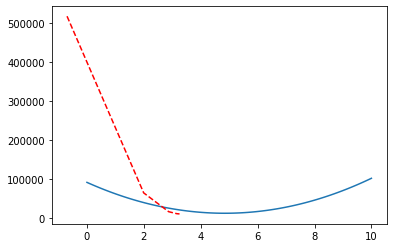

In [8]:
plt.plot(m_test, m_errors)
plt.plot(m_hist, error_hist, 'r--')
plt.show()

---
# Additional Challenge!

Here, we have just 1 dimensional input. Try implementing the same for inputs with 10 dimensions!